Final Solution (x2):
[-2.00000000e+00 -9.99999999e-01  5.03159070e-10  1.00000000e+00
  2.00000000e+00]
Final Residual Error:
1.3404530818661442e-09
Iteration Data:
[[-1.66666667e+00 -6.19047619e-01  2.85714286e-01  1.11111111e+00
   1.88888889e+00]
 [-2.11111111e+00 -1.02494331e+00  1.70068027e-02  1.02557319e+00
   2.00934744e+00]
 [-2.00449735e+00 -1.00677573e+00 -2.95594428e-03  1.00054240e+00
   2.00136866e+00]
 [-1.99869657e+00 -1.00003694e+00 -3.97194970e-04  9.99751337e-01
   1.99993794e+00]
 [-1.99987586e+00 -9.99916603e-01  1.28983851e-05  9.99982403e-01
   1.99997972e+00]
 [-2.00000974e+00 -9.99995040e-01  5.33214485e-06  1.00000219e+00
   1.99999973e+00]
 [-2.00000203e+00 -1.00000074e+00  1.07826352e-07  1.00000033e+00
   2.00000023e+00]
 [-1.99999999e+00 -1.00000010e+00 -5.96183562e-08  9.99999990e-01
   2.00000002e+00]
 [-1.99999997e+00 -9.99999996e-01 -4.35742337e-09  9.99999996e-01
   2.00000000e+00]
 [-2.00000000e+00 -9.99999999e-01  5.03159070e-10  1.00000000e+00
   2

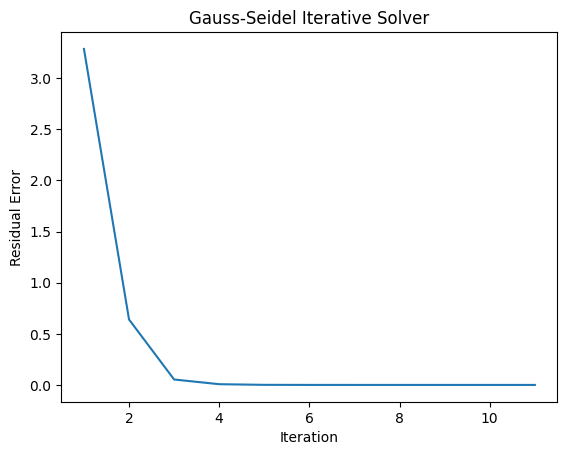

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel_solver(A, b):
    # Gauss-Seidel iterative solver for Ax = b
    
    # Set default values for tolerance and maximum iterations
    max_tol = 1e-8
    max_iter = 150
    
    # Initialize variables
    n = len(b)
    x1 = np.zeros(n)
    x2 = np.copy(x1)
    k = 0

    # Norm type for residual error
    p = np.inf

    # Initial residual error
    error = np.linalg.norm(np.dot(A, x1) - b, p)
    
    # Initialize tolerance
    tol = np.inf

    # Lists to store iteration data
    data1 = []
    data2 = []

    # Gauss-Seidel iteration loop
    while tol > max_tol and k < max_iter:
        x2[:] = x1
        
        # Gauss-Seidel iteration formula
        for i in range(n):
            temp = np.dot(A[i, :i], x1[:i]) + np.dot(A[i, i+1:], x2[i+1:])
            x1[i] = (b[i] - temp) / A[i, i]
        
        # Update tolerance and iteration count
        tol = np.linalg.norm(x1 - x2, p) / np.linalg.norm(x1, p)
        k += 1
        
        # Update residual error
        error = np.linalg.norm(np.dot(A, x1) - b, p)
        
        # Store iteration data
        data1.append(np.copy(x1))
        data2.append([k, error])
    
    # Display final solution, error, and iteration data
    print('Final Solution (x2):')
    print(x2)
    
    print('Final Residual Error:')
    print(error)
    
    print('Iteration Data:')
    print(np.array(data1))
    
    # Plotting
    data2 = np.array(data2)
    plt.figure()
    plt.plot(data2[:, 0], data2[:, 1])
    plt.xlabel('Iteration')
    plt.ylabel('Residual Error')
    plt.title('Gauss-Seidel Iterative Solver')
    plt.show()

# Given matrix A and vector b
A = np.array([[6, 1, 1, 1, 1],
              [1, 7, 1, 1, 1],
              [1, 1, 8, 1, 1],
              [1, 1, 1, 9, 1],
              [1, 1, 1, 1, 10]])

b = np.array([-10, -6, 0, 8, 18])

# Call the solver function
gauss_seidel_solver(A, b)